# Business Understanding

### Kickstarter - general idea

Kickstarter, founded in 2009, is one particularly well-known and popular crowdfunding platform. It has an all-or-nothing funding model, whereby a project is only funded if it meets its goal amount; otherwise no money is given by backers to a project.
A huge variety of factors contribute to the success or failure of a project — in general, and also on Kickstarter. Some of these are able to be quantified or categorized, which allows for the construction of a model to attempt to predict whether a project will succeed or not. The aim of this project is to construct such a model and also to analyse Kickstarter project data more generally, in order to help potential project creators assess whether or not Kickstarter is a good funding option for them, and what their chances of success are.

<br>

whether or not Kickstarter is a good funding option for them --> depends on category and the implementation of the project on the website

<br>


# Setup

In [58]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Data Mining

Dataset is already given but is splitted into several smaller chunks, so put all pieces together

In [59]:
import glob

# Generate a dataframe with all csv-files

path =r'data'
filenames = glob.glob(path + "/*.csv")
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))
    
# Concatenate all data into one DataFrame

df_raw = pd.concat(dfs, ignore_index=True)

# Data Cleaning

## First look at dataframe

In [60]:
df_raw.shape

(209222, 37)

In [61]:
# following function lets us see all columns one by one
pd.set_option('display.max_columns', None)

In [62]:
#Check the top entries:
df_raw.head(3)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,315,Babalus Shoes,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",28645,US,1541459205,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",USD,$,True,USD,1552539775,False,NaN,1.0,28000.0,2108505034,NaN,False,NaN,1548223375,"{""id"":2462429,""name"":""Novato"",""slug"":""novato-c...",Babalus Children's Shoes,NaN,"{""key"":""assets/023/667/205/a565fde5382d6b53276...",28645.0,"{""id"":3508024,""project_id"":3508024,""state"":""in...",babalus-childrens-shoes,https://www.kickstarter.com/discover/categorie...,False,False,live,1548223375,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",28645.0,international
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,USD,1504976459,False,NaN,1.0,1000.0,928751314,NaN,False,NaN,1502384459,"{""id"":2400549,""name"":""Euless"",""slug"":""euless-t...",The Ofrenda Oracle Deck,NaN,"{""key"":""assets/017/766/989/dd9f18c773a8546d996...",1950.0,"{""id"":3094785,""project_id"":3094785,""state"":""ac...",the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1950.0,domestic
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...","{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,USD,1371013395,False,NaN,1.0,15000.0,928014092,NaN,False,NaN,1368421395,"{""id"":2423474,""name"":""Hollywood"",""slug"":""holly...","Record Electra's Debut Album (Pop, Rock, Class...",NaN,"{""key"":""assets/011/433/681/489fd66f7861fefd8c8...",22404.0,"{""id"":359847,""project_id"":359847,""state"":""inac...",record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",22404.0,international


In [63]:
#Check the last entries:
df_raw.tail(3)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
209219,62,What started as a homemade gift has turned int...,"{""id"":52,""name"":""Hardware"",""slug"":""technology/...",2681,US,1341343795,"{""id"":891767476,""name"":""Doug Stienstra"",""is_re...",USD,$,True,USD,1347854340,False,NaN,1.0,2500.0,67097337,NaN,False,NaN,1344976590,"{""id"":2357536,""name"":""Austin"",""slug"":""austin-t...",FlashPals: Cuddly USB Drives Save More Than Yo...,NaN,"{""key"":""assets/011/390/191/4f70456881abb2dcedd...",2681.0,"{""id"":248552,""project_id"":248552,""state"":""inac...",flashpals-cuddly-usb-drives-save-more-than-you...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1347854341,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",2681.0,international
209220,76,Seattle Transmedia & Independent Film Festival...,"{""id"":295,""name"":""Festivals"",""slug"":""film & vi...",5692,US,1425256957,"{""id"":307076473,""name"":""Timothy Vernor"",""is_re...",USD,$,True,USD,1429536375,False,NaN,1.0,5500.0,1031742546,NaN,False,NaN,1426944375,"{""id"":2510075,""name"":""University District"",""sl...",Transmedia Gallery Space STIFF 2015,NaN,"{""key"":""assets/012/055/131/c728543aff0f2d3dfca...",5692.0,"{""id"":1741612,""project_id"":1741612,""state"":""in...",transmedia-gallery-space-stiff-2015,https://www.kickstarter.com/discover/categorie...,True,False,successful,1429536379,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",5692.0,domestic
209221,44,The @1000TimesYes 2009 Tweet Box is a handmade...,"{""id"":13,""name"":""Journalism"",""slug"":""journalis...",1293,US,1263225900,"{""id"":1718677513,""name"":""Article"",""slug"":""arti...",USD,$,True,USD,1266814740,False,NaN,1.0,1000.0,1374988684,NaN,False,NaN,1264099593,"{""id"":2459115,""name"":""New York"",""slug"":""new-yo...",The @1000TimesYes 2009 Tweet Box,NaN,"{""key"":""assets/011/259/312/82bb715be131b061ecd...",1293.0,"{""id"":2624,""project_id"":2624,""state"":""inactive...",the-1000timesyes-2009-tweet-box,https://www.kickstarter.com/discover/categorie...,True,True,successful,1266814815,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1293.0,domestic


## Look for missing values

In [64]:
import missingno

# visualize all missings in plot

if len(df_raw[df_raw.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df_raw[df_raw.isnull().any(axis=1)].head(3))
    missingno.matrix(df_raw)
    plt.show()

# give out missings as list

missing_data = df_raw.isnull().sum().sort_values(ascending=False)
print(missing_data)

ModuleNotFoundError: No module named 'missingno'

for "is_backing", "permissions", "is_starred", "friends" almost all values are missings, so we'll drop these columns, since we have no direct options to impute these values

In [65]:
#Creating new dataset without columns filled with nans
df_dropclean = df_raw.drop(["is_backing","permissions","is_starred", "friends"], axis=1)

## Look at variables itself

Following variables give no further insight to our goal, since they include URLs / symbols, which don't have any insight for us for now, so we'll drop them aswell 

In [66]:
df_dropclean = df_dropclean.drop(["currency_symbol","photo", "slug", "source_url", "urls"], axis=1)

Let's look at "disable_communication"

In [67]:
df_dropclean.disable_communication.value_counts()

False    208599
True        623
Name: disable_communication, dtype: int64

Since almost every project allowed communication with their backers, this adds no extra insight to our analysis, so we'll drop this variable. We assume that not enabling communication would have a bad impact on whether the project is backed, so we'll keep this in mind for future work

In [68]:
df_dropclean = df_dropclean.drop(["disable_communication"], axis=1)

### Odd-formatting - dictionaries
Let's have a look at the four peculiar formatted variables category, location, profile and creator by manually selecting the first entry of the first csv-chunk

- category<br>
{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""position"":17,""parent_id"":14,""color"":10878931,""urls"":{""web"":{""discover"":""http://www.kickstarter.com/discover/categories/music/rock""}}}
<br>
<br>

- location<br>
{""id"":2379574,""name"":""Chicago"",""slug"":""chicago-il"",""short_name"":""Chicago, IL"",""displayable_name"":""Chicago, IL"",""localized_name"":""Chicago"",""country"":""US"",""state"":""IL"",""type"":""Town"",""is_root"":false,""urls"":{""web"":{""discover"":""https://www.kickstarter.com/discover/places/chicago-il"",""location"":""https://www.kickstarter.com/locations/chicago-il""},""api"":{""nearby_projects"":""https://api.kickstarter.com/v1/discover?signature=1552595044.c1041c6bca69b0b72738f3b9504ebf921b3e5e0e&woe_id=2379574""}}}
<br>
<br>

- profile<br>
{""id"":822687,""project_id"":822687,""state"":""inactive"",""state_changed_at"":1425915845,""name"":null,""blurb"":null,""background_color"":null,""text_color"":null,""link_background_color"":null,""link_text_color"":null,""link_text"":null,""link_url"":null,""show_feature_image"":false,""background_image_opacity"":0.8,""should_show_feature_image_section"":true,""feature_image_attributes"":{""image_urls"":{""default"":""https://ksr-ugc.imgix.net/assets/011/625/534/5bea1760d7f20943c4cd5e9b4911c1bd_original.jpg?ixlib=rb-1.1.0&crop=faces&w=1552&h=873&fit=crop&v=1463685705&auto=format&frame=1&q=92&s=90c72b785ef97539099dffb8531dcad3"",""baseball_card"":""https://ksr-ugc.imgix.net/assets/011/625/534/5bea1760d7f20943c4cd5e9b4911c1bd_original.jpg?ixlib=rb-1.1.0&crop=faces&w=560&h=315&fit=crop&v=1463685705&auto=format&frame=1&q=92&s=883b3ff098e5fc4cf6fec280665f5fd0""}}}
<br>
<br>

- creator<br>
{""id"":1495925645,""name"":""Daniel"",""is_registered"":null,""chosen_currency"":null,""avatar"":{""thumb"":""https://ksr-ugc.imgix.net/assets/006/041/047/c44d1a95c2139ae46af635c7c6e7ea76_original.jpg?ixlib=rb-1.1.0&w=40&h=40&fit=crop&v=1461362658&auto=format&frame=1&q=92&s=3d655afafac9dbb59c1e675adfa87082"",""small"":""https://ksr-ugc.imgix.net/assets/006/041/047/c44d1a95c2139ae46af635c7c6e7ea76_original.jpg?ixlib=rb-1.1.0&w=160&h=160&fit=crop&v=1461362658&auto=format&frame=1&q=92&s=3973d24f5c3db1ed1d5c84cec8af1d6d"",""medium"":""https://ksr-ugc.imgix.net/assets/006/041/047/c44d1a95c2139ae46af635c7c6e7ea76_original.jpg?ixlib=rb-1.1.0&w=160&h=160&fit=crop&v=1461362658&auto=format&frame=1&q=92&s=3973d24f5c3db1ed1d5c84cec8af1d6d""},""urls"":{""web"":{""user"":""https://www.kickstarter.com/profile/1495925645""},""api"":{""user"":""https://api.kickstarter.com/v1/users/1495925645?signature=1552621462.382152be8688b069cea0ab5f3a266a1530d83c3f""}}}

- "profile" has no other information than already provided in the dataframe, so let's drop it
- "location" adresses cities and states. We assume that the city/state doesn't have any effect on the kickstarter success, since it's brought to the internet, where location doesn't play a big role. The country information is provided in another feature in the column name, so we'll drop this one, too.

In [69]:
df_dropclean = df_dropclean.drop(["location", "profile"], axis=1)

* "category" and "creator" may lead to interesting insights, so we'll keep them for now and encode the interesting information from the long strings

In [70]:
# replace symbols and unnecessary text

df_dropclean['category'].replace(regex=True,inplace=True,to_replace=r'"',value=r'')
df_dropclean['category'].replace(regex=True,inplace=True,to_replace=r'{',value=r'')
df_dropclean['category'].replace(regex=True,inplace=True,to_replace=r'id:',value=r'')
df_dropclean['category'].replace(regex=True,inplace=True,to_replace=r'name:',value=r'') 
df_dropclean['category'].replace(regex=True,inplace=True,to_replace=r'slug:',value=r'')

# separate the unformatted strings and build new columns out of them
# only select first three information, rest is not of interest

df_dropclean["category_ID"] = df_dropclean["category"].str.split(",", n =3, expand = True).loc[:,0]
df_dropclean["subcategory"] = df_dropclean["category"].str.split(",", n =3, expand = True).loc[:,1]
df_dropclean["metacategory"] = df_dropclean["category"].str.split(",", n =3, expand = True).loc[:,2]
df_dropclean["metacategory"] = df_dropclean["metacategory"].str.split("/").str[0]

# drop old category column, since it is now encoded

df_dropclean = df_dropclean.drop (["category"], axis=1)

In [71]:
# do the same for creator, here we are only interested in the creator ID

df_dropclean['creator'].replace(regex=True,inplace=True,to_replace=r'"',value=r'')
df_dropclean['creator'].replace(regex=True,inplace=True,to_replace=r'{',value=r'')
df_dropclean['creator'].replace(regex=True,inplace=True,to_replace=r'id:',value=r'')
df_dropclean["creator_ID"] = df_dropclean["creator"].str.split(",", n =1, expand = True).loc[:,0]

# drop old creator column, since it is now encoded
df_dropclean = df_dropclean.drop (["creator"], axis=1)

### Currency-related variables
Have a deeper look at all the curreny-related columns

In [72]:
# continue with copy of dataframe to save progress
df_dropclean2 = df_dropclean.copy()

##### 1. current_currency
* Due to uncertainty weather values are converted into USD, drop rows, where "current_currency" is not USD
* number of instances dropped is quite small compared to the whole dataset

In [73]:
df_dropclean2.current_currency.value_counts()

USD    208742
CAD       372
AUD        72
GBP        24
EUR        12
Name: current_currency, dtype: int64

In [74]:
df_dropclean2 = df_dropclean2[df_dropclean2.current_currency == 'USD']
##Check:
df_dropclean2.current_currency.value_counts()

USD    208742
Name: current_currency, dtype: int64

##### 2. convert the minimum threshold ("goal") into USD, to be consistent

In [75]:
df_dropclean2['goal_usd'] = df_dropclean2['goal'] * df_dropclean2['static_usd_rate']

##### 3. delete all non-relevant currency-related columns
- this includes old "goal" variable, both exchange rates, "pledged" (information already in "converted pledged amount") and "usd_type" (yields no information)
- usd_pledged and converted_pledged_amount identical, so also dropped

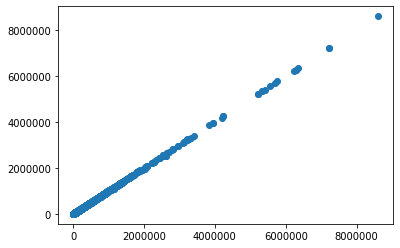

In [76]:
plt.scatter(x=df_dropclean2["usd_pledged"],y=df_dropclean2["converted_pledged_amount"]);

In [77]:
df_dropclean2 = df_dropclean2.drop(columns = ['goal','pledged',"usd_pledged",'static_usd_rate', 
                                              'fx_rate', 'current_currency', 'usd_type',"currency_trailing_code"
                                             ])

### Time-related variables

##### Time-related variables are formatted in Unix timeformat
Understanding Unix timeformat:

The unix time stamp is a way to track time as a running total of seconds. This count starts at the Unix Epoch on January 1st, 1970 at UTC. Therefore, the unix time stamp is merely the number of seconds between a particular date and the Unix Epoch. It should also be pointed out that this point in time technically does not change no matter where you are located on the globe. <br>
--> all time variables are **measured in seconds!** <br> <br>
we can easily calculate the difference between different states of the projects:
    * created_at
    * deadline
    * launched at
    * state_changed_at 

we can also convert back with timestap method in original/known data structure

In [78]:
# convert to timestamp
#df_dropclean2['created_at'] = pd.to_datetime(df_dropclean2['created_at'],unit='s')
#df_dropclean2['launched_at'] = pd.to_datetime(df_dropclean2['launched_at'],unit='s')
#df_dropclean2['state_changed_at'] = pd.to_datetime(df_dropclean2['state_changed_at'],unit='s')
##df_dropclean2['deadline'] = pd.to_datetime(df_dropclean2['deadline'],unit='s')

In [79]:
# create interpretable time differences
df_dropclean2['creation_time_to_launch'] = df_dropclean2['launched_at'] - df_dropclean2['created_at']
df_dropclean2['goal_reached_time'] = df_dropclean2['state_changed_at'] - df_dropclean2['launched_at']
df_dropclean2['planned_time'] = df_dropclean2['deadline'] - df_dropclean2['launched_at']
df_dropclean2

,backers_count,blurb,converted_pledged_amount,country,created_at,currency,deadline,id,is_starrable,launched_at,name,spotlight,staff_pick,state,state_changed_at,category_ID,subcategory,metacategory,creator_ID,goal_usd,creation_time_to_launch,goal_reached_time,planned_time
0,315,Babalus Shoes,28645,US,1541459205,USD,1552539775,2108505034,False,1548223375,Babalus Children's Shoes,False,False,live,1548223375,266,Footwear,fashion,2094277840,28000.000000,6764170,0,4316400
1,47,A colorful Dia de los Muertos themed oracle de...,1950,US,1501684093,USD,1504976459,928751314,False,1502384459,The Ofrenda Oracle Deck,True,False,successful,1504976459,273,Playing Cards,games,723886115,1000.000000,700366,2592000,2592000
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...",22404,US,1348987533,USD,1371013395,928014092,False,1368421395,"Record Electra's Debut Album (Pop, Rock, Class...",True,False,successful,1371013395,43,Rock,music,323849677,15000.000000,19433862,2592000,2592000
3,3,The Mist of Tribunal is a turn-based card game...,165,GB,1483780271,GBP,1489425776,596091328,False,1484245376,The Mist of Tribunal - A Card Game,False,False,failed,1489425776,273,Playing Cards,games,196281496,12160.656900,465105,5180400,5180400
4,3,"Livng with a brain impairment, what its like t...",2820,US,1354817071,USD,1357763527,998516049,False,1355171527,Help change the face of Brain Impairment,True,False,successful,1357763527,48,Nonfiction,publishing,1178460181,2800.000000,354456,2592000,2592000
5,35,Annapolis Chamber Players is a non-for profit ...,3725,US,1414172150,USD,1430533546,1224600291,False,1427941546,Annapolis Chamber Music Project,True,False,successful,1430533546,36,Classical Music,music,682189804,3500.000000,13769396,2592000,2592000
6,71,The Tekalli Duo are commissioning a new piece ...,3890,US,1377997955,USD,1381540320,1778058413,False,1378940849,The Tekalli Duo's New Music and New Concert Se...,True,False,successful,1381540320,36,Classical Music,music,455482155,2500.000000,942894,2599471,2599471
7,33,A new slam-bangin' swing album from The Rustmo...,660,US,1546965483,USD,1550067305,1481360049,False,1547475305,The Swing Album: A Slam-Bangin' Lindy Hoppin' ...,True,True,successful,1550067307,14,Music,music,1945007923,400.000000,509822,2592002,2592000
8,14,Five insurgents are on the run from police. Th...,540,GB,1458818444,GBP,1462921200,962374325,False,1460469384,The Hold-up,True,False,successful,1462921200,283,Immersive,theater,1128471608,529.786729,1650940,2451816,2451816
9,76,Hard Enamel Pins inspired by companions from D...,2552,GB,1547071506,GBP,1550667601,1915400457,False,1548075601,Dragon Age Character Profile Hard Enamel Pin B...,True,False,successful,1550667601,262,Accessories,fashion,1606701235,489.324989,1004095,2592000,2592000


In [80]:
### Convert into more meaningful time interval (from seconds in hours):
df_dropclean2['creation_time_to_launch'] = df_dropclean2['creation_time_to_launch'].div(3600)
df_dropclean2['goal_reached_time'] = df_dropclean2['goal_reached_time'].div(3600)
df_dropclean2['planned_time'] = df_dropclean2['planned_time'].div(3600)
df_dropclean2

,backers_count,blurb,converted_pledged_amount,country,created_at,currency,deadline,id,is_starrable,launched_at,name,spotlight,staff_pick,state,state_changed_at,category_ID,subcategory,metacategory,creator_ID,goal_usd,creation_time_to_launch,goal_reached_time,planned_time
0,315,Babalus Shoes,28645,US,1541459205,USD,1552539775,2108505034,False,1548223375,Babalus Children's Shoes,False,False,live,1548223375,266,Footwear,fashion,2094277840,28000.000000,1878.936111,0.000000,1199.000000
1,47,A colorful Dia de los Muertos themed oracle de...,1950,US,1501684093,USD,1504976459,928751314,False,1502384459,The Ofrenda Oracle Deck,True,False,successful,1504976459,273,Playing Cards,games,723886115,1000.000000,194.546111,720.000000,720.000000
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...",22404,US,1348987533,USD,1371013395,928014092,False,1368421395,"Record Electra's Debut Album (Pop, Rock, Class...",True,False,successful,1371013395,43,Rock,music,323849677,15000.000000,5398.295000,720.000000,720.000000
3,3,The Mist of Tribunal is a turn-based card game...,165,GB,1483780271,GBP,1489425776,596091328,False,1484245376,The Mist of Tribunal - A Card Game,False,False,failed,1489425776,273,Playing Cards,games,196281496,12160.656900,129.195833,1439.000000,1439.000000
4,3,"Livng with a brain impairment, what its like t...",2820,US,1354817071,USD,1357763527,998516049,False,1355171527,Help change the face of Brain Impairment,True,False,successful,1357763527,48,Nonfiction,publishing,1178460181,2800.000000,98.460000,720.000000,720.000000
5,35,Annapolis Chamber Players is a non-for profit ...,3725,US,1414172150,USD,1430533546,1224600291,False,1427941546,Annapolis Chamber Music Project,True,False,successful,1430533546,36,Classical Music,music,682189804,3500.000000,3824.832222,720.000000,720.000000
6,71,The Tekalli Duo are commissioning a new piece ...,3890,US,1377997955,USD,1381540320,1778058413,False,1378940849,The Tekalli Duo's New Music and New Concert Se...,True,False,successful,1381540320,36,Classical Music,music,455482155,2500.000000,261.915000,722.075278,722.075278
7,33,A new slam-bangin' swing album from The Rustmo...,660,US,1546965483,USD,1550067305,1481360049,False,1547475305,The Swing Album: A Slam-Bangin' Lindy Hoppin' ...,True,True,successful,1550067307,14,Music,music,1945007923,400.000000,141.617222,720.000556,720.000000
8,14,Five insurgents are on the run from police. Th...,540,GB,1458818444,GBP,1462921200,962374325,False,1460469384,The Hold-up,True,False,successful,1462921200,283,Immersive,theater,1128471608,529.786729,458.594444,681.060000,681.060000
9,76,Hard Enamel Pins inspired by companions from D...,2552,GB,1547071506,GBP,1550667601,1915400457,False,1548075601,Dragon Age Character Profile Hard Enamel Pin B...,True,False,successful,1550667601,262,Accessories,fashion,1606701235,489.324989,278.915278,720.000000,720.000000


### Check for duplicates

In [81]:
# check for duplicates via project id --> "id"

duplicates = df_dropclean2[df_dropclean2.duplicated(['id'], keep=False)]
duplicates = duplicates.sort_values(by=['id'], ascending = False)
duplicates.head(10)

,backers_count,blurb,converted_pledged_amount,country,created_at,currency,deadline,id,is_starrable,launched_at,name,spotlight,staff_pick,state,state_changed_at,category_ID,subcategory,metacategory,creator_ID,goal_usd,creation_time_to_launch,goal_reached_time,planned_time
159940,709,"Over 6,000 thoughtfully designed icons that ar...",70751,US,1496320996,USD,1503079200,2147345648,False,1501074784,"Symbolicons Pro: Your friendly, versatile, go-...",True,False,successful,1503079200,51,Software,technology,876759573,12000.000000,1320.496667,556.782222,556.782222
120077,709,"Over 6,000 thoughtfully designed icons that ar...",70751,US,1496320996,USD,1503079200,2147345648,False,1501074784,"Symbolicons Pro: Your friendly, versatile, go-...",True,False,successful,1503079200,51,Software,technology,876759573,12000.000000,1320.496667,556.782222,556.782222
88133,56,"With your support, Movema can relocate to offi...",4793,GB,1459856095,GBP,1463055812,2147339483,False,1460463812,Movema Dance Studio,True,False,successful,1463055812,256,Spaces,dance,1660245681,4238.293830,168.810278,720.000000,720.000000
144573,56,"With your support, Movema can relocate to offi...",4793,GB,1459856095,GBP,1463055812,2147339483,False,1460463812,Movema Dance Studio,True,False,successful,1463055812,256,Spaces,dance,1660245681,4238.293830,168.810278,720.000000,720.000000
201817,7,"This is a project, which aims to save lives of...",252,GB,1458583791,GBP,1464741329,2147283151,False,1459557329,The Call - a voice to the voiceless,False,False,failed,1464741329,358,Photo,journalism,589340019,26541.791085,270.427222,1440.000000,1440.000000
20082,7,"This is a project, which aims to save lives of...",252,GB,1458583791,GBP,1464741329,2147283151,False,1459557329,The Call - a voice to the voiceless,False,False,failed,1464741329,358,Photo,journalism,589340019,26541.791085,270.427222,1440.000000,1440.000000
18411,2,NudeART Book and Fineart Print for You. \nWith...,241,DE,1438272070,EUR,1440867761,2147180546,False,1438275761,NudeART - Hardcover Book and FineART Print,True,False,successful,1440867761,280,Photobooks,photography,131906106,176.157962,1.025278,720.000000,720.000000
102009,2,NudeART Book and Fineart Print for You. \nWith...,241,DE,1438272070,EUR,1440867761,2147180546,False,1438275761,NudeART - Hardcover Book and FineART Print,True,False,successful,1440867761,280,Photobooks,photography,131906106,176.157962,1.025278,720.000000,720.000000
120926,46,"Just in time for grilling season. An ""all pur...",1642,US,1497532295,USD,1498846758,2147144291,False,1497550758,Jubilee Espresso Rub,True,False,successful,1498846759,313,Small Batch,food,162516791,1000.000000,5.128611,360.000278,360.000000
137762,46,"Just in time for grilling season. An ""all pur...",1642,US,1497532295,USD,1498846758,2147144291,False,1497550758,Jubilee Espresso Rub,True,False,successful,1498846759,313,Small Batch,food,162516791,1000.000000,5.128611,360.000278,360.000000


In [82]:
# delete duplicates
df_dropclean2 = df_dropclean2.drop_duplicates(subset ="id")
df_dropclean2.shape

(182228, 23)

##### check again for missing values

In [83]:
missings = df_dropclean2.isna().sum().sort_values(ascending=False)
missings

blurb                       8
planned_time                0
name                        0
converted_pledged_amount    0
country                     0
created_at                  0
currency                    0
deadline                    0
id                          0
is_starrable                0
launched_at                 0
spotlight                   0
goal_reached_time           0
staff_pick                  0
state                       0
state_changed_at            0
category_ID                 0
subcategory                 0
metacategory                0
creator_ID                  0
goal_usd                    0
creation_time_to_launch     0
backers_count               0
dtype: int64

drop 8 rows with missings

In [84]:
df_dropclean2 = df_dropclean2.dropna(subset=['blurb'])
df_dropclean2.shape

(182220, 23)

### Data types

##### convert name and description of project into lenght-variables

In [85]:
df_dropclean2["name"] = df_dropclean2["name"].str.len()
df_dropclean2["blurb"] = df_dropclean2["blurb"].str.len()
df_dropclean2 = df_dropclean2.rename(columns={"name":"len_of_name","blurb":"len_of_description"})

##### bring dataframe in an order

In [86]:
# rearrange order

df_dropclean2 = df_dropclean2[["state","converted_pledged_amount","goal_usd","backers_count","currency",
                               "id","len_of_name","len_of_description","metacategory","subcategory",
                               "category_ID","creator_ID","country","is_starrable","spotlight","staff_pick",
                               "created_at","launched_at","state_changed_at","deadline",
                               "creation_time_to_launch","goal_reached_time","planned_time"
                              ]]
df_dropclean2 = df_dropclean2.rename(columns={"id":"project_ID"})
df_dropclean2

,state,converted_pledged_amount,goal_usd,backers_count,currency,project_ID,len_of_name,len_of_description,metacategory,subcategory,category_ID,creator_ID,country,is_starrable,spotlight,staff_pick,created_at,launched_at,state_changed_at,deadline,creation_time_to_launch,goal_reached_time,planned_time
0,live,28645,28000.000000,315,USD,2108505034,24,13,fashion,Footwear,266,2094277840,US,False,False,False,1541459205,1548223375,1548223375,1552539775,1878.936111,0.000000,1199.000000
1,successful,1950,1000.000000,47,USD,928751314,23,125,games,Playing Cards,273,723886115,US,False,True,False,1501684093,1502384459,1504976459,1504976459,194.546111,720.000000,720.000000
2,successful,22404,15000.000000,271,USD,928014092,51,108,music,Rock,43,323849677,US,False,True,False,1348987533,1368421395,1371013395,1371013395,5398.295000,720.000000,720.000000
3,failed,165,12160.656900,3,GBP,596091328,34,133,games,Playing Cards,273,196281496,GB,False,False,False,1483780271,1484245376,1489425776,1489425776,129.195833,1439.000000,1439.000000
4,successful,2820,2800.000000,3,USD,998516049,40,121,publishing,Nonfiction,48,1178460181,US,False,True,False,1354817071,1355171527,1357763527,1357763527,98.460000,720.000000,720.000000
5,successful,3725,3500.000000,35,USD,1224600291,31,134,music,Classical Music,36,682189804,US,False,True,False,1414172150,1427941546,1430533546,1430533546,3824.832222,720.000000,720.000000
6,successful,3890,2500.000000,71,USD,1778058413,51,123,music,Classical Music,36,455482155,US,False,True,False,1377997955,1378940849,1381540320,1381540320,261.915000,722.075278,722.075278
7,successful,660,400.000000,33,USD,1481360049,51,135,music,Music,14,1945007923,US,False,True,True,1546965483,1547475305,1550067307,1550067305,141.617222,720.000556,720.000000
8,successful,540,529.786729,14,GBP,962374325,11,135,theater,Immersive,283,1128471608,GB,False,True,False,1458818444,1460469384,1462921200,1462921200,458.594444,681.060000,681.060000
9,successful,2552,489.324989,76,GBP,1915400457,50,55,fashion,Accessories,262,1606701235,GB,False,True,False,1547071506,1548075601,1550667601,1550667601,278.915278,720.000000,720.000000


In [87]:
df_dropclean2["is_starrable"].value_counts()

False    178486
True       3734
Name: is_starrable, dtype: int64

In [88]:
df_dropclean2["staff_pick"].value_counts()

False    159888
True      22332
Name: staff_pick, dtype: int64

In [89]:
df_dropclean2["spotlight"].value_counts()

True     94779
False    87441
Name: spotlight, dtype: int64

In [90]:
df_dropclean2["creator_ID"].value_counts()

2104052526    72
957058942     59
978911160     52
2039317553    36
1323060510    35
1655558466    35
578114575     32
863477191     32
63602967      31
1229765692    30
172204344     28
1398250711    27
1077465647    27
1426920270    26
1229605719    26
338197751     25
316444840     25
1436966359    24
1582272995    24
337503446     24
667419690     23
1712814392    21
1215805427    21
1241276222    21
841430805     21
897079804     20
1943918369    20
1383111647    20
1704592942    20
426929895     20
              ..
966968223      1
1416083374     1
1361923964     1
471621891      1
642412435      1
53168326       1
1760320469     1
857789864      1
1404886961     1
366523521      1
1509810239     1
875968005      1
1473959947     1
697005815      1
828792229      1
675314443      1
1587002368     1
1013222110     1
131250677      1
955061406      1
2113188865     1
493171320      1
2137413200     1
614737633      1
349343952      1
498491708      1
1839688136     1
264245301     

### Save file for Feature Engineering:

In [91]:
df_dropclean2.to_csv(r'dataframes/cleaned_dataframe.csv', index = False, header=True)